In [1]:
import matplotlib.pyplot as plt
import json
from glob import glob
import seaborn as sns
import pandas as pd

In [2]:
all_output_files = glob("./scottish_stats/*output.json")

outputs_by_type = {}
for output_file in all_output_files:
    with open(output_file, "r") as f:
        output = json.load(f)
    election_type = output_file.split("/")[-1].split("_")[0]
    outputs_by_type[election_type] = output


In [3]:
ordered_rules = ["borda", "3-approval", "2-approval", "plurality", "stv"]
ordered_outputs = {key: outputs_by_type[key] for key in ordered_rules}

In [4]:
def construct_df(data_dictionary, n_cands, metric):
    df_data = []
    for rule, data in data_dictionary.items():
        df_data.append(data[str(n_cands)][metric]) 

    return pd.DataFrame(df_data, index=data_dictionary.keys()).T

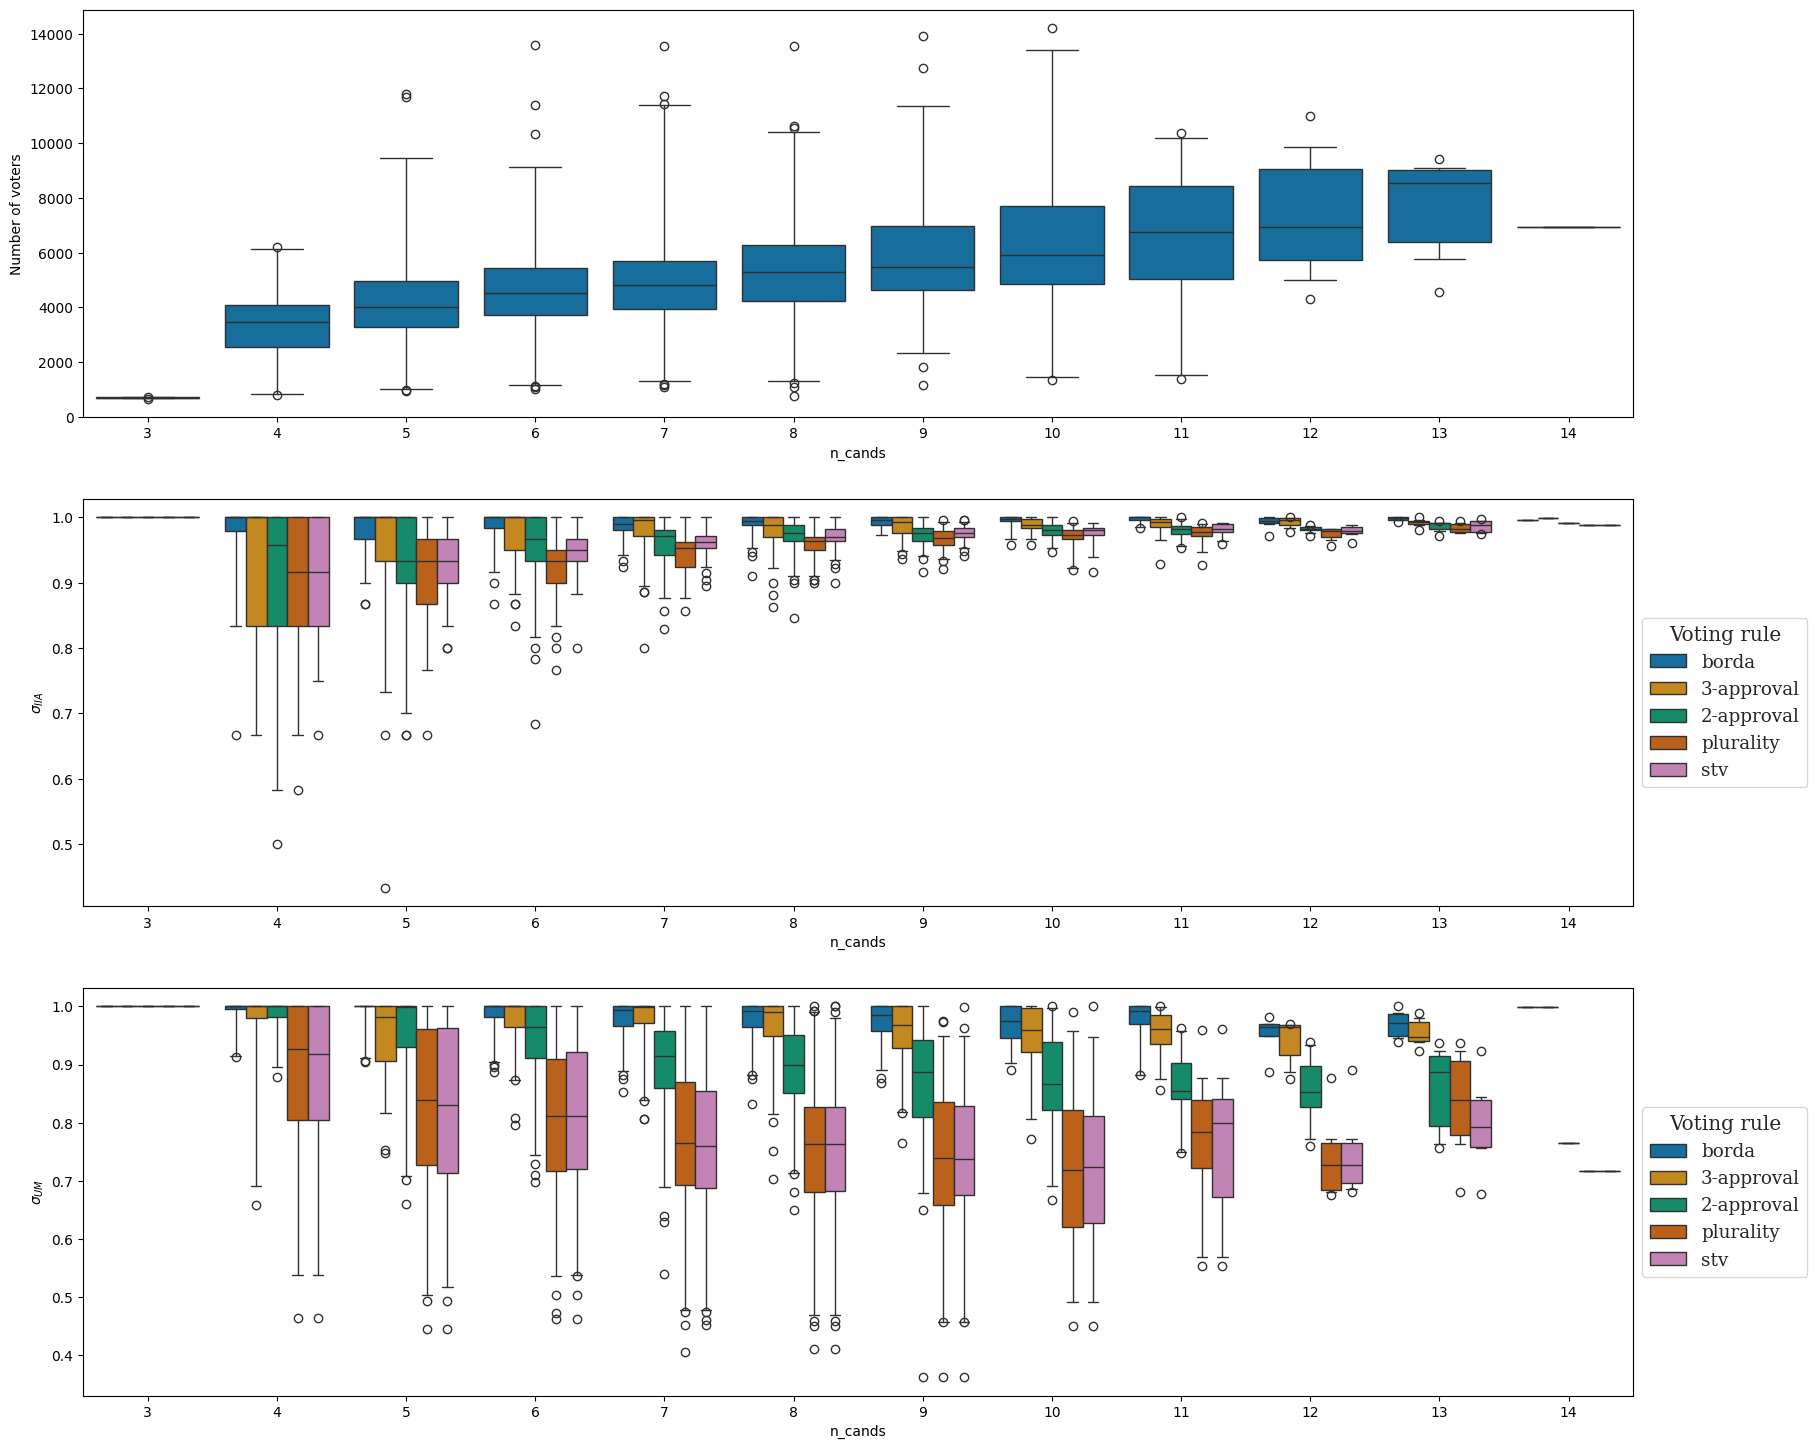

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(20, 18)) 

sns.set_theme(style="whitegrid", context="notebook",
              font="serif", font_scale=1.2)

def build_plot_for_metric(metric, ax, y_label="", use_one=False):
    df_list = []
    for n_cands in range(3, 15):
        df = construct_df(ordered_outputs, n_cands, metric)
        df = df.melt(var_name="rule", value_name="value")
        df["n_cands"] = n_cands
        df_list.append(df)

    if use_one:
        df_list = [df[df["rule"] == "borda"] for df in df_list]

    long = pd.concat(df_list, ignore_index=True)

    palette = sns.color_palette("colorblind", len(ordered_rules))
    rule_color_map = dict(zip(ordered_rules, palette))


    sns.boxplot(
        data=long,
        x="n_cands",
        y="value",              # σ_IIA values
        hue="rule",
        palette=rule_color_map,
        dodge=True,
        ax=ax,
        legend=not use_one,    # don't show legend if only one rule
        whis=[1,99]
    )

    ax.set_ylabel(y_label)
    if not use_one:
        ax.legend(title="Voting rule", bbox_to_anchor=(1, 0.5), loc="center left")



build_plot_for_metric("n_voters", ax[0], y_label= "Number of voters", use_one=True)
build_plot_for_metric("sigma_IIA", ax[1], y_label="$\sigma_{IIA}$")
build_plot_for_metric("sigma_UM", ax[2], y_label="$\sigma_{UM}$")
plt.savefig("./plots/scottish_sigma_plots.png", bbox_inches="tight", dpi=300)

In [6]:
all_stats_files =  glob("./scottish_stats/*stats.json") 

stats_by_type = {}
for stats_file in all_stats_files:
    with open(stats_file, "r") as f:
        stats = json.load(f)
    election_type = stats_file.split("/")[-1].split("_")[0]
    stats_by_type[election_type] = stats

In [ ]:
df = pd.concat(
        {rule: pd.DataFrame(sub).T
         for rule, sub in stats_by_type.items()},
        names=["rule", "n_cands"]            # names for the new index levels
     )

df.index = df.index.set_levels(
                df.index.levels[1].astype(int), level="n_cands"
            )
df = df.reindex(
    pd.MultiIndex.from_product(
        [ordered_rules, range(3, 15)], names=["rule", "n_cands"]
    ),
)

df.to_csv("./scottish_stats/scottish_stats_all.csv")

In [8]:
df

median_voters  max_voters  mean_sigma_IIA  \
rule       n_cands                                              
borda      3                700.0       739.0        1.000000   
           4               3448.0      6210.0        0.967593   
           5               3996.0     11788.0        0.977879   
           6               4531.0     13579.0        0.985285   
           7               4819.0     13547.0        0.988517   
           8               5289.0     13567.0        0.991143   
           9               5480.0     13909.0        0.993913   
           10              5910.0     14207.0        0.994686   
           11              6746.0     10376.0        0.997203   
           12              6934.0     10996.0        0.992614   
           13              8532.0      9433.0        0.997669   
           14              6924.0      6924.0        0.996337   
3-approval 3                700.0       739.0        1.000000   
           4               3448.0      6210.0        0.932870   
           5               3996.0     11788.0        0.954242   
           6               4531.0     13579.0        0.973333   
           7               4819.0     13547.0        0.981121   
           8               5289.0     13567.0        0.981740   
           9               5480.0     13909.0        0.987288   
           10              5910.0     14207.0        0.988285   
           11              6746.0     10376.0        0.988112   
           12              6934.0     10996.0        0.992424   
           13              8532.0      9433.0        0.991453   
           14              6924.0      6924.0        0.999084   
2-approval 3                700.0       739.0        1.000000   
           4               3448.0      6210.0        0.898148   
           5               3996.0     11788.0        0.931212   
           6               4531.0     13579.0        0.956179   
           7               4819.0     13547.0        0.963458   
           8               5289.0     13567.0        0.970784   
           9               5480.0     13909.0        0.974509   
           10              5910.0     14207.0        0.979106   
           11              6746.0     10376.0        0.980264   
           12              6934.0     10996.0        0.981629   
           13              8532.0      9433.0        0.986208   
           14              6924.0      6924.0        0.990842   
plurality  3                700.0       739.0        1.000000   
           4               3448.0      6210.0        0.907407   
           5               3996.0     11788.0        0.909394   
           6               4531.0     13579.0        0.926748   
           7               4819.0     13547.0        0.946538   
           8               5289.0     13567.0        0.959742   
           9               5480.0     13909.0        0.967884   
           10              5910.0     14207.0        0.972222   
           11              6746.0     10376.0        0.975369   
           12              6934.0     10996.0        0.974432   
           13              8532.0      9433.0        0.984071   
           14              6924.0      6924.0        0.988095   
stv        3                700.0       739.0        1.000000   
           4               3448.0      6210.0        0.921296   
           5               3996.0     11788.0        0.934545   
           6               4531.0     13579.0        0.951951   
           7               4819.0     13547.0        0.961871   
           8               5289.0     13567.0        0.971647   
           9               5480.0     13909.0        0.976628   
           10              5910.0     14207.0        0.977536   
           11              6746.0     10376.0        0.980730   
           12              6934.0     10996.0        0.978788   
           13              8532.0      9433.0        0.986597   
           14              6924.0      6924.0        0.